In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylcp
import lmfit
from pylcp.common import progressBar

In [3]:
laser_det = -2.5
ham_det = 0.0
s = 2.0

laserBeams = {}
laserBeams['$\\sigma^+\\sigma^-$'] = pylcp.laserBeams([
    {'kvec':np.array([0., 0., -1.]), 'pol':+1,
     'pol_coord':'spherical', 'delta':laser_det, 's':s},
    {'kvec':np.array([0., 0., +1.]), 'pol':+1,
     'pol_coord':'spherical', 'delta':laser_det, 's':s},
    # {'kvec':np.array([0., -1., 0.]), 'pol':+1,
     # 'pol_coord':'spherical', 'delta':laser_det, 's':s},
    # {'kvec':np.array([0., +1., 0.]), 'pol':+1,
     # 'pol_coord':'spherical', 'delta':laser_det, 's':s},
    # {'kvec':np.array([-1., 0., 0.]), 'pol':+1,
     # 'pol_coord':'spherical', 'delta':laser_det, 's':s},
    # {'kvec':np.array([+1., 0., 0.]), 'pol':+1,
     # 'pol_coord':'spherical', 'delta':laser_det, 's':s}
    ], beam_type=pylcp.infinitePlaneWaveBeam)

In [4]:
magField = lambda R: np.zeros(R.shape)

# Hamiltonian for F=1->F=1
Hg, Bgq = pylcp.hamiltonians.singleF(F=1, gF=0, muB=0)
He, Beq = pylcp.hamiltonians.singleF(F=1, gF=0, muB=0)
dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(1, 1)
ham_F1_to_F1 = pylcp.hamiltonian(Hg, He - ham_det, Bgq, Beq, dijq)

In [5]:
obe={}
rateeq={}

# Define a v axis:
v = np.arange(3.0, 3.01, 0.1)

for jj, key in enumerate(laserBeams.keys()):
    print('Working on %s:' % key)
    rateeq[key] = pylcp.rateeq(laserBeams[key], magField, ham_F1_to_F1)
    obe[key] = pylcp.obe(laserBeams[key], magField, ham_F1_to_F1,
                         transform_into_re_im=False, include_mag_forces=False)

    # Generate a rateeq model of what's going on:
#     rateeq[key].generate_force_profile(
#         [np.zeros(v.shape), np.zeros(v.shape), np.zeros(v.shape)],
#         [np.zeros(v.shape), np.zeros(v.shape), v],
#         name='molasses'
#     )

    obe[key].generate_force_profile(
        [np.zeros(v.shape), np.zeros(v.shape), np.zeros(v.shape)],
        [np.zeros(v.shape), v, np.zeros(v.shape)],
        # [np.zeros(v.shape), np.zeros(v.shape), v],
        name='molasses', deltat_tmax=2*np.pi*100, deltat_v=200, itermax=1000,
        progress_bar=True,
    )

Working on $\sigma^+\sigma^-$:
Completed in 0.92 s.


Text(0, 0.5, '$f/(\\hbar k \\Gamma)$')

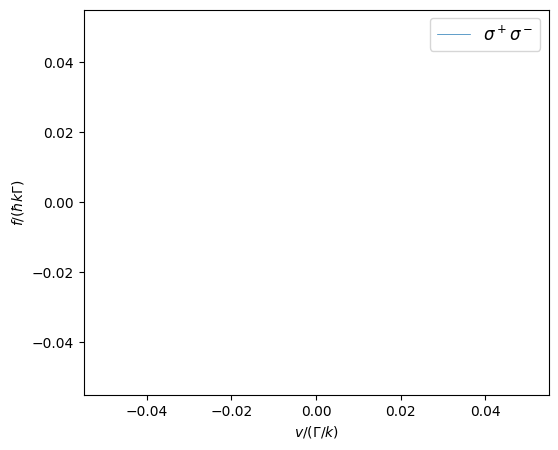

In [6]:
fig, ax = plt.subplots(1, 1, num='Optical Molasses F=1->F1', figsize=(6, 5))
for jj, key in enumerate(laserBeams.keys()):
    ax.plot(obe[key].profile['molasses'].V[0],
               obe[key].profile['molasses'].F[0],
               label=key, linewidth=0.5, color='C%d'%jj)
ax.legend(fontsize=12)
ax.set_xlabel('$v/(\Gamma/k)$')
ax.set_ylabel('$f/(\hbar k \Gamma)$')

In [7]:
laserBeams['$\\sigma^+\\sigma^-$'].delta()

array([-2.5, -2.5])

In [8]:
laserBeams['$\\sigma^+\\sigma^-$'].beam_vector[1].kvec()

array([0., 0., 1.])

In [9]:
from pandas import *

In [10]:
laserBeams['$\\sigma^+\\sigma^-$'].pol()

array([[1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [11]:
e = laserBeams['$\\sigma^+\\sigma^-$'].electric_field(np.array([0.0, 5.0 * 1.0,0.0]), 1.0)
# e = laserBeams['$\\sigma^+\\sigma^-$'].electric_field(np.array([0.0,0.0,1000.0]), 1000.0)
e / 2

array([[-0.80114362-0.59847214j,  0.        -0.j        ,
         0.        -0.j        ],
       [ 0.        -0.j        ,  0.        -0.j        ,
        -0.80114362-0.59847214j]])

In [12]:
DataFrame( np.real(obe['$\\sigma^+\\sigma^-$'].hamiltonian.return_full_H(e[0]+e[1], [0,0,0])) ) / 2

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,-0.283247,0.000000
1,0.000000,0.000000,0.000000,0.283247,0.000000,-0.283247
2,0.000000,0.000000,0.000000,0.000000,0.283247,0.000000
3,0.000000,0.283247,0.000000,0.000000,0.000000,0.000000
4,-0.283247,0.000000,0.283247,0.000000,0.000000,0.000000
5,0.000000,-0.283247,0.000000,0.000000,0.000000,0.000000


In [13]:
DataFrame( np.imag(obe['$\\sigma^+\\sigma^-$'].hamiltonian.return_full_H(e[0]+e[1], [0,0,0])) ) / 2

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,-0.211592,0.000000
1,0.000000,0.000000,0.000000,0.211592,0.000000,-0.211592
2,0.000000,0.000000,0.000000,0.000000,0.211592,0.000000
3,0.000000,-0.211592,0.000000,0.000000,0.000000,0.000000
4,0.211592,0.000000,-0.211592,0.000000,0.000000,0.000000
5,0.000000,0.211592,0.000000,0.000000,0.000000,0.000000


In [14]:
DataFrame( np.real(obe['$\\sigma^+\\sigma^-$'].hamiltonian.d_q_bare['g->e'][2]) )

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,-0.707107,0.000000,0.0
2,0.0,0.0,0.0,0.000000,-0.707107,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.000000,0.0


In [15]:
DataFrame( np.real(obe['$\\sigma^+\\sigma^-$'].hamiltonian.return_full_H(e[0] + e[1], np.array([0.0,0.0,0.0]))) )

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,-0.566494,0.000000
1,0.000000,0.000000,0.000000,0.566494,0.000000,-0.566494
2,0.000000,0.000000,0.000000,0.000000,0.566494,0.000000
3,0.000000,0.566494,0.000000,0.000000,0.000000,0.000000
4,-0.566494,0.000000,0.566494,0.000000,0.000000,0.000000
5,0.000000,-0.566494,0.000000,0.000000,0.000000,0.000000


In [16]:
DataFrame(  np.imag(obe['$\\sigma^+\\sigma^-$'].hamiltonian.return_full_H(e[0] + e[1], np.array([0.0,0.0,0.0]))) )

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,-0.423184,0.000000
1,0.000000,0.000000,0.000000,0.423184,0.000000,-0.423184
2,0.000000,0.000000,0.000000,0.000000,0.423184,0.000000
3,0.000000,-0.423184,0.000000,0.000000,0.000000,0.000000
4,0.423184,0.000000,-0.423184,0.000000,0.000000,0.000000
5,0.000000,0.423184,0.000000,0.000000,0.000000,0.000000


In [17]:
obe['$\\sigma^+\\sigma^-$'].ev_mat['decay']

array([[ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
       ...,
       [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j, -1.+0.j]])

In [18]:
obe['$\\sigma^+\\sigma^-$'].ev_mat['decay'][11]

array([ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j, -0.5+0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j])

In [19]:
obe['$\\sigma^+\\sigma^-$'].ev_mat['d_q']['g->e'][0][1]

array([0.+0.j       , 0.+0.j       , 0.+0.j       , 0.+0.j       ,
       0.+0.j       , 0.-0.1767767j, 0.+0.j       , 0.+0.j       ,
       0.+0.j       , 0.+0.j       , 0.+0.j       , 0.+0.j       ,
       0.+0.j       , 0.+0.j       , 0.+0.j       , 0.+0.j       ,
       0.+0.j       , 0.+0.j       , 0.+0.j       , 0.+0.j       ,
       0.+0.j       , 0.+0.j       , 0.+0.j       , 0.+0.j       ,
       0.+0.j       , 0.+0.j       , 0.+0.j       , 0.+0.j       ,
       0.+0.j       , 0.+0.j       , 0.+0.j       , 0.+0.j       ,
       0.+0.j       , 0.+0.j       , 0.+0.j       , 0.+0.j       ])

In [20]:
print("v", v[-1])
for val in obe[key].profile['molasses'].Neq[0,:]:
    print(val)

v 3.0
0.49878384905255785
4.6530788666917306e-17
0.49878384905255785
1.0551000967059317e-18
0.0024323018948844703
8.624871008690479e-19


In [22]:
obe[key].set_initial_position_and_velocity(
    np.array([0., 0., 0.]), np.array([0., 0., 1.])
    )

In [23]:
t_max = 1000.0
obe[key].rho0 *= 0.0
obe[key].rho0[7] = 1.0
obe[key].evolve_density(t_span=[0, t_max], t_eval=np.linspace(0, t_max, 1001), progress_bar=True, method="RK45", atol=1e-6);

Completed in 1.34 s.                                                


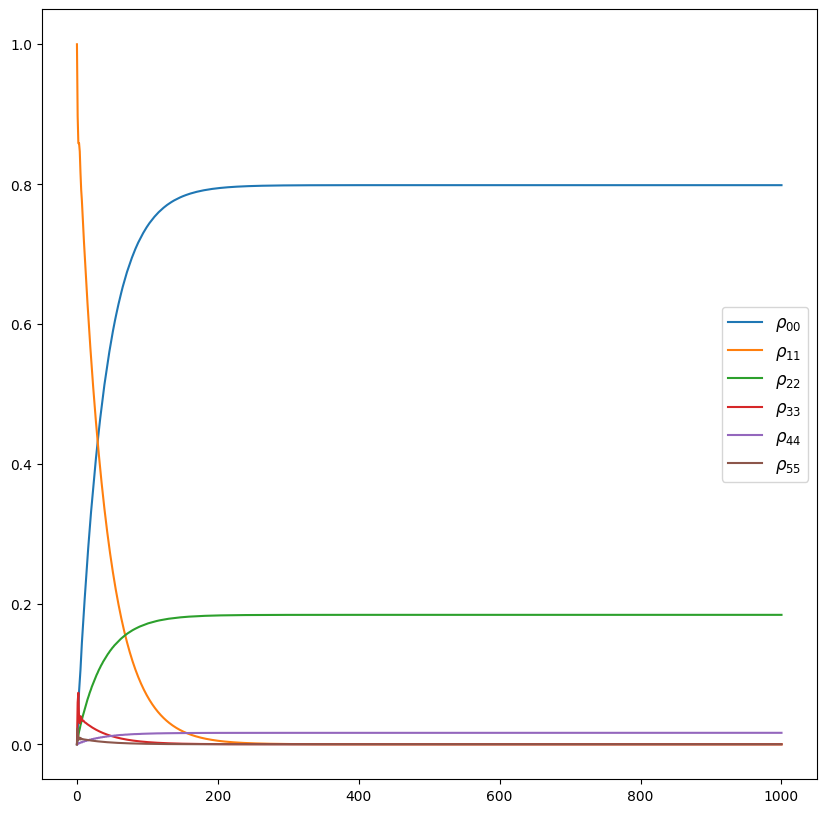

In [24]:
fig, ax = plt.subplots(1, 1, num='OBE F=1->F1', figsize=(10, 10))
ax.plot(obe[key].sol.t, np.real(obe[key].sol.rho[0, 0]), label='$\\rho_{00}$')
ax.plot(obe[key].sol.t, np.real(obe[key].sol.rho[1, 1]), label='$\\rho_{11}$')
ax.plot(obe[key].sol.t, np.real(obe[key].sol.rho[2, 2]), label='$\\rho_{22}$')
ax.plot(obe[key].sol.t, np.real(obe[key].sol.rho[3, 3]), label='$\\rho_{33}$')
ax.plot(obe[key].sol.t, np.real(obe[key].sol.rho[4, 4]), label='$\\rho_{44}$')
ax.plot(obe[key].sol.t, np.real(obe[key].sol.rho[5, 5]), label='$\\rho_{55}$')
ax.legend(fontsize=12)

In [25]:
for i in range(6):
    print(np.real(obe[key].sol.rho[i, i])[-1])

0.7987198262962016
4.279315348124821e-12
0.1849057628747588
1.941955131857476e-13
0.016374410824523247
4.168364835874412e-14


In [811]:
obe[key].ev_mat['H0'] *= 0.0
obe[key].ev_mat['B'] *= 0.0
obe[key].ev_mat['d_q']['g->e'] *= 0.0
obe[key].ev_mat['d_q*']['g->e'] *= 0.0

In [812]:
# obe[key].ev_mat['decay'] *= 0.0
r = np.array([0.0, t_max, 0.0])
t = t_max
ev = obe[key].full_OBE_ev(r, t)

In [813]:
drhodt = np.zeros((6,6), dtype='complex128')
drhodt_vector = ev @ obe[key].sol['rho'][:,:,-1].flatten()
for i in range(6):
    for j in range(6):
        drhodt[i,j] = drhodt_vector[i + j * 6]

In [805]:
DataFrame( np.real(drhodt) ) # without decays

,0,1,2,3,4,5
0,5.750316e-03,-1.323510e-02,-5.750316e-03,-1.324461e-02,-1.326757e-18,-1.324461e-02
1,-1.323510e-02,-2.023021e-02,1.323510e-02,-1.418263e-02,5.253644e-18,-1.418263e-02
2,-5.750316e-03,1.323510e-02,5.750316e-03,1.324461e-02,2.100973e-20,1.324461e-02
3,-1.324461e-02,-1.418263e-02,1.324461e-02,4.364789e-03,-2.394494e-18,4.364789e-03
4,-2.310059e-18,6.953524e-18,3.043539e-18,-3.655976e-19,-1.526423e-19,4.003256e-20
5,-1.324461e-02,-1.418263e-02,1.324461e-02,4.364789e-03,-1.095488e-18,4.364789e-03


In [806]:
DataFrame( np.imag(drhodt) ) # without decays

,0,1,2,3,4,5
0,-1.734723e-18,1.774867e-02,-1.951564e-18,-7.447094e-03,2.188452e-18,-7.447094e-03
1,-1.774867e-02,5.717037e-18,1.774867e-02,-1.058089e-01,3.349556e-18,-1.058089e-01
2,3.035766e-18,-1.774867e-02,-6.505213e-19,7.447094e-03,-2.098975e-18,7.447094e-03
3,7.447094e-03,1.058089e-01,-7.447094e-03,-4.336809e-19,1.983080e-18,-2.602085e-18
4,7.400480e-20,5.754225e-18,1.072774e-18,-1.304610e-18,-2.002747e-19,-1.289654e-18
5,7.447094e-03,1.058089e-01,-7.447094e-03,-6.505213e-19,7.570891e-19,-2.818926e-18


In [816]:
DataFrame( np.real(drhodt) ) # decays only

,0,1,2,3,4,5
0,3.124326e-03,1.005036e-19,-3.124326e-03,-1.930407e-03,-3.352640e-19,-1.930407e-03
1,3.737331e-20,6.248653e-03,2.792602e-19,-2.026925e-02,3.500934e-19,-2.026925e-02
2,-3.124326e-03,-1.931708e-19,3.124326e-03,1.930407e-03,2.682379e-19,1.930407e-03
3,-1.930407e-03,-2.026925e-02,1.930407e-03,-6.248653e-03,-5.585204e-19,-6.248653e-03
4,-2.861051e-19,-2.113735e-19,-4.765276e-20,3.863416e-19,-6.201238e-20,-2.010073e-19
5,-1.930407e-03,-2.026925e-02,1.930407e-03,-6.248653e-03,-7.474662e-20,-6.248653e-03


In [815]:
DataFrame( np.imag(drhodt) ) # decays only

,0,1,2,3,4,5
0,1.698656e-19,6.753079e-20,7.186843e-19,-1.320947e-03,-7.988803e-19,-1.320947e-03
1,-1.707655e-19,7.016618e-19,-1.114951e-19,2.006753e-02,-4.535027e-19,2.006753e-02
2,-4.032545e-19,-1.767338e-19,6.087119e-19,1.320947e-03,4.941274e-19,1.320947e-03
3,1.320947e-03,-2.006753e-02,-1.320947e-03,-2.628155e-19,2.229903e-19,1.437369e-18
4,1.063253e-19,8.734911e-19,-2.269047e-19,3.534676e-19,-7.691566e-20,-1.350616e-19
5,1.320947e-03,-2.006753e-02,-1.320947e-03,-8.065090e-19,3.415310e-19,-1.140508e-18


In [808]:
DataFrame( np.real(drhodt) ) # all

,0,1,2,3,4,5
0,5.750316e-03,-1.323510e-02,-5.750316e-03,-1.324461e-02,-1.326757e-18,-1.324461e-02
1,-1.323510e-02,-2.023021e-02,1.323510e-02,-1.418263e-02,5.253644e-18,-1.418263e-02
2,-5.750316e-03,1.323510e-02,5.750316e-03,1.324461e-02,2.100973e-20,1.324461e-02
3,-1.324461e-02,-1.418263e-02,1.324461e-02,4.364789e-03,-2.394494e-18,4.364789e-03
4,-2.310059e-18,6.953524e-18,3.043539e-18,-3.655976e-19,-1.526423e-19,4.003256e-20
5,-1.324461e-02,-1.418263e-02,1.324461e-02,4.364789e-03,-1.095488e-18,4.364789e-03


In [810]:
DataFrame( np.imag(drhodt) ) # all

,0,1,2,3,4,5
0,-1.734723e-18,1.774867e-02,-1.951564e-18,-7.447094e-03,2.188452e-18,-7.447094e-03
1,-1.774867e-02,5.717037e-18,1.774867e-02,-1.058089e-01,3.349556e-18,-1.058089e-01
2,3.035766e-18,-1.774867e-02,-6.505213e-19,7.447094e-03,-2.098975e-18,7.447094e-03
3,7.447094e-03,1.058089e-01,-7.447094e-03,-4.336809e-19,1.983080e-18,-2.602085e-18
4,7.400480e-20,5.754225e-18,1.072774e-18,-1.304610e-18,-2.002747e-19,-1.289654e-18
5,7.447094e-03,1.058089e-01,-7.447094e-03,-6.505213e-19,7.570891e-19,-2.818926e-18


In [807]:
obe[key].sol['rho'][:,:,-1]

array([[ 6.60103087e-02+3.62655573e-18j, -9.09971810e-02+5.40908444e-02j,
        -6.60103087e-02+6.38656989e-18j,  3.86081306e-03-2.64189384e-03j,
         5.72210131e-19-2.12650508e-19j,  3.86081306e-03-2.64189384e-03j],
       [-9.09971810e-02-5.40908444e-02j,  8.55482077e-01-3.25811654e-18j,
         9.09971810e-02+5.40908444e-02j,  4.05384945e-02+4.01350672e-02j,
         4.22746934e-19-1.74698212e-18j,  4.05384945e-02+4.01350672e-02j],
       [-6.60103087e-02-1.14559483e-17j,  9.09971810e-02-5.40908444e-02j,
         6.60103087e-02-4.79965524e-18j, -3.86081306e-03+2.64189384e-03j,
         9.53055213e-20+4.53809402e-19j, -3.86081306e-03+2.64189384e-03j],
       [ 3.86081306e-03+2.64189384e-03j,  4.05384945e-02-4.01350672e-02j,
        -3.86081306e-03-2.64189384e-03j,  6.24865276e-03+2.62815483e-19j,
        -3.86341648e-19-3.53467574e-19j,  6.24865276e-03+8.06508982e-19j],
       [ 6.70527992e-19+1.59776054e-18j, -7.00186763e-19+9.07005465e-19j,
        -5.36475796e-19-9.88254735